In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import statsmodels.api as sm

In [5]:
#상관관계분석 
df1 = pd.read_csv("c://bd092_data/app_data.csv")
df1.head()
df1.info()
df1.isnull().sum()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       503 non-null    object 
 1   Category  503 non-null    object 
 2   Rating    503 non-null    int64  
 3   Reviews   503 non-null    int64  
 4   Installs  503 non-null    int64  
 5   Price     503 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 23.7+ KB


,Rating,Reviews,Installs,Price
count,503.000000,5.030000e+02,5.030000e+02,503.000000
mean,3.616302,3.114368e+05,6.351265e+06,0.477793
std,0.904775,1.445690e+06,1.935525e+07,2.021677
min,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,3.000000,2.300000e+01,1.000000e+03,0.000000
50%,4.000000,1.063000e+03,1.000000e+05,0.000000
75%,4.000000,4.397500e+04,1.000000e+06,0.000000
max,5.000000,2.313478e+07,1.000000e+08,24.990000


In [8]:
df1.head()
df1.groupby('Category').corr()

Rating   Reviews  Installs     Price
Category                                                 
BUSINESS Rating    1.000000  0.278807  0.253754       NaN
         Reviews   0.278807  1.000000  0.813561       NaN
         Installs  0.253754  0.813561  1.000000       NaN
         Price          NaN       NaN       NaN       NaN
FAMILY   Rating    1.000000  0.084505  0.080352  0.011514
         Reviews   0.084505  1.000000  0.806909 -0.041023
         Installs  0.080352  0.806909  1.000000 -0.052766
         Price     0.011514 -0.041023 -0.052766  1.000000
GAME     Rating    1.000000  0.079435  0.107061  0.050028
         Reviews   0.079435  1.000000  0.738193 -0.081277
         Installs  0.107061  0.738193  1.000000 -0.123064
         Price     0.050028 -0.081277 -0.123064  1.000000
MEDICAL  Rating    1.000000  0.123000  0.114838  0.014121
         Reviews   0.123000  1.000000  0.786807 -0.108375
         Installs  0.114838  0.786807  1.000000 -0.168153
         Price     0.014121 -0.108375 -0.168153  1.000000
TOOLS    Rating    1.000000  0.151109  0.160142  0.030763
         Reviews   0.151109  1.000000  0.912202 -0.130634
         Installs  0.160142  0.912202  1.000000 -0.140791
         Price     0.030763 -0.130634 -0.140791  1.000000

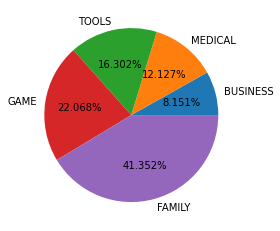

In [15]:
df1.corr()
cat = df1['Category'].value_counts().sort_values(ascending=True)
import matplotlib.pyplot as plt 
plt.pie(cat, labels=cat.index, autopct='%.3f%%')
plt.show()

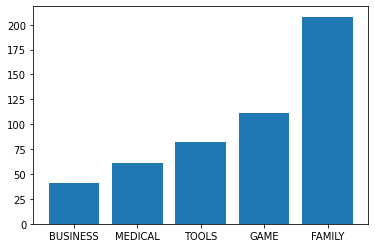

In [17]:
plt.bar(cat.index, cat)
plt.show()

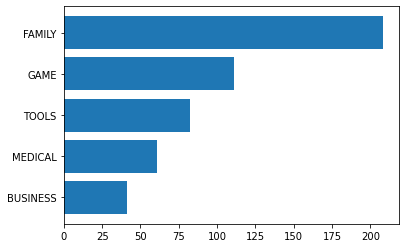

In [18]:
plt.barh(cat.index, cat)
plt.show()

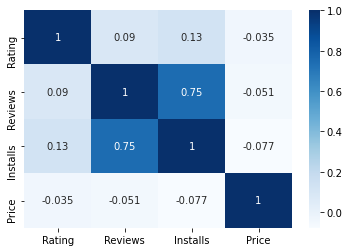

In [23]:
import seaborn as sns
sns.heatmap(df1.corr(), cmap='Blues', annot=True)


In [28]:
#상관관계 분석
df2 = pd.read_csv('c://bd092_data/ozone.csv')
df2.head()
df2.info()
df2.isnull().sum()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [36]:
df2.isnull().sum().sort_values(ascending=True)
df2['Ozone'] = df2['Ozone'].fillna(df2['Ozone'].mean())
df2['Solar.R'] = df2['Solar.R'].fillna(df2['Solar.R'].mean())
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [37]:
df2.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


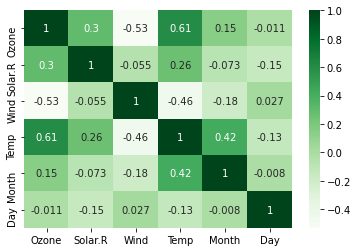

In [40]:
df2.corr()
sns.heatmap(df2.corr(), cmap='Greens', annot=True)

In [43]:
x = df2[['Solar.R', 'Wind', 'Temp']]
y = df2['Ozone']
import statsmodels.api as sm
x1 = sm.add_constant(x, has_constant='add')

In [64]:
linear_m = sm.OLS(y, x1).fit()
linear_m.summary()


ValueError: The indices for endog and exog are not aligned

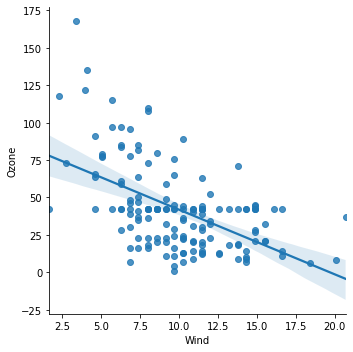

In [65]:
sns.lmplot(y='Ozone', x='Wind', data=df2)

In [47]:
#로지스틱 회귀분석
df3 = pd.read_csv('c://bd092_data/BankPersonalLoan.csv')
df3.head()
df3.info()
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [48]:
df3.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [50]:
df3.drop(['ID', 'Experience', 'ZIP Code'], axis=1, inplace=True)

In [75]:
df3.head()
df3.info()
x = df3.drop('Personal Loan', axis=1)
y = df3['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:,:])
x_test.iloc[:,:] = stdsc.transform(x_test.iloc[:,:])

logistic_m = sm.Logit(y_train, x_train).fit()
logistic_m.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB
Optimization terminated successfully.
         Current function value: 0.617262
         Iterations 6


C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                 -0.9521
Time:                        00:31:11   Log-Likelihood:                -2160.4
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0348      0.037      0.950      0.342      -0.037       0.107
Income                 0.7018      0.053     13.353      0.000       0.599       0.805
Family                 0.1863      0.038      4.962      0.000       0.113       0.260
CCAvg                  0.0630      0.049      1.275      0.202      -0.034       0.160
Education              0.3354      0.038      8.781      0.000       0.261       0.410
Mortgage               0.0474      0.040      1.200      0.230      -0.030       0.125
Securities Account    -0.1094      0.040     -2.706      0.007      -0.189      -0.030
CD Account             0.4516      0.053      8.488      0.000       0.347       0.556
Online                -0.0535      0.037     -1.454      0.146      -0.126       0.019
CreditCard            -0.0930      0.038     -2.431      0.015      -0.168      -0.018
======================================================================================
"""

In [76]:
dog = logistic_m.params.sort_values(ascending=True)
np.exp(dog).sort_values(ascending=False)

Income                2.017448
CD Account            1.570839
Education             1.398521
Family                1.204842
CCAvg                 1.065048
Mortgage              1.048584
Age                   1.035461
Online                0.947919
CreditCard            0.911203
Securities Account    0.896381
dtype: float64

In [77]:
#로지스틱 회귀분석 _ 머신러닝 방식

In [80]:
df4 = pd.read_csv('c://bd092_data/BankPersonalLoan.csv')
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [85]:
x = df4.drop('Personal Loan', axis=1)
y = df4['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
from sklearn.linear_model import LogisticRegression

In [88]:
logistic_mm = LogisticRegression(solver='liblinear', penalty='l2', C=0.001, random_state=1)
logistic_mm.fit(x_train, y_train)

LogisticRegression(C=0.001, random_state=1, solver='liblinear')

In [92]:
y_pred = logistic_mm.predict(x_test)
y_pred
y_pred_p = logistic_mm.predict_proba(x_test)
y_pred_p

array([[0.75182716, 0.24817284],
       [0.98671728, 0.01328272],
       [0.99731151, 0.00268849],
       ...,
       [0.6567234 , 0.3432766 ],
       [0.99250059, 0.00749941],
       [0.56274788, 0.43725212]])

In [96]:
from sklearn.metrics import confusion_matrix, classification_report
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat
from sklearn.metrics import accuracy_score, f1_score

In [97]:
print('오분류 갯수 : %d' %(y_test!=y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f1_score :%.3f' %f1_score(y_test, y_pred))

오분류 갯수 : 149
정확도 : 0.901
f1_score :0.371


In [104]:
#의사결정나무 분석
df5 = pd.read_csv('c://bd092_data/BankPersonalLoan.csv')
df5.head()
df5.drop(['ID', 'Experience', 'ZIP Code'], axis=1, inplace=True)
df5.head()
x = df5.drop('Personal Loan', axis=1)
y = df5['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
from sklearn.tree import DecisionTreeClassifier

In [105]:
tree_m = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=None )
tree_m.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [109]:
y_pred = tree_m.predict(x_test)
y_pred
y_pred_p = tree_m.predict_proba(x_test)
y_pred_p

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [112]:
tree_m.score(x_test, y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))
print('오분류 : %d' %(y_test!=y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f1점수 : %.3f' %f1_score(y_test, y_pred))

오분류 : 29
정확도 : 0.981
f1점수 : 0.898


In [119]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


feature_name = x.columns.tolist()
target_name = np.array(['NO', 'YES'])



<Figure size 1440x1440 with 0 Axes>

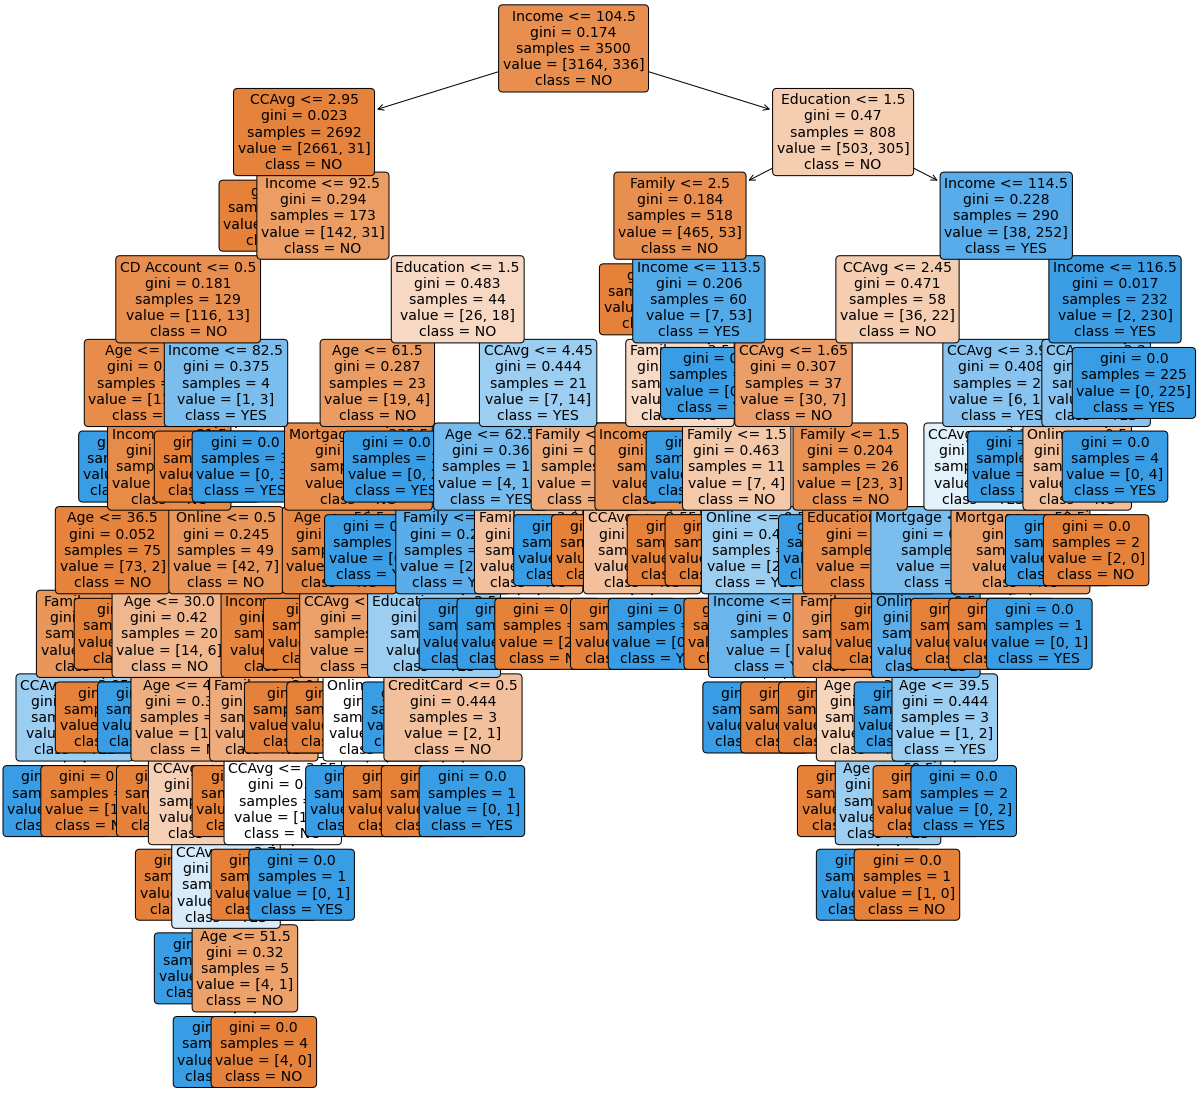

In [122]:
plt.figure(figsize=(20,20))
tree1 = plot_tree(tree_m, 
                 feature_names = feature_name,
                 class_names = target_name,
                 filled=True,
                 rounded=True,
                 fontsize=14)


In [123]:
#최적화

In [127]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

tree_m_2 = make_pipeline(DecisionTreeClassifier())
tree_m_2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [128]:
params_range1 = range(1,11)
params_range2 = range(5,26,5)

param_grid = [{'decisiontreeclassifier__max_depth' : params_range1, 
              'decisiontreeclassifier__min_samples_leaf' : params_range2}]

clf_cv = GridSearchCV(estimator=tree_m_2, 
                     param_grid = param_grid,
                     scoring='accuracy',
                     n_jobs=-1,
                     cv=10)
clf_cv.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__max_depth': range(1, 11),
                          'decisiontreeclassifier__min_samples_leaf': range(5, 26, 5)}],
             scoring='accuracy')

In [131]:
print(clf_cv.best_score_)
print(clf_cv.best_params_)

0.9848571428571429
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10}


In [132]:
#최적화로 알아낸 값 적용하기 

In [134]:
tree_m_new7 = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5, min_samples_leaf=10)
tree_m_new7.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)

In [136]:
y_pred = tree_m_new7.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
tree_m_new7.score(x_test, y_test)

0.9806666666666667

In [140]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat
print('오분류 갯수 : %d' %(y_test!=y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f1점수 : %.3f' %f1_score(y_test, y_pred))

오분류 갯수 : 29
정확도 : 0.981
f1점수 : 0.896


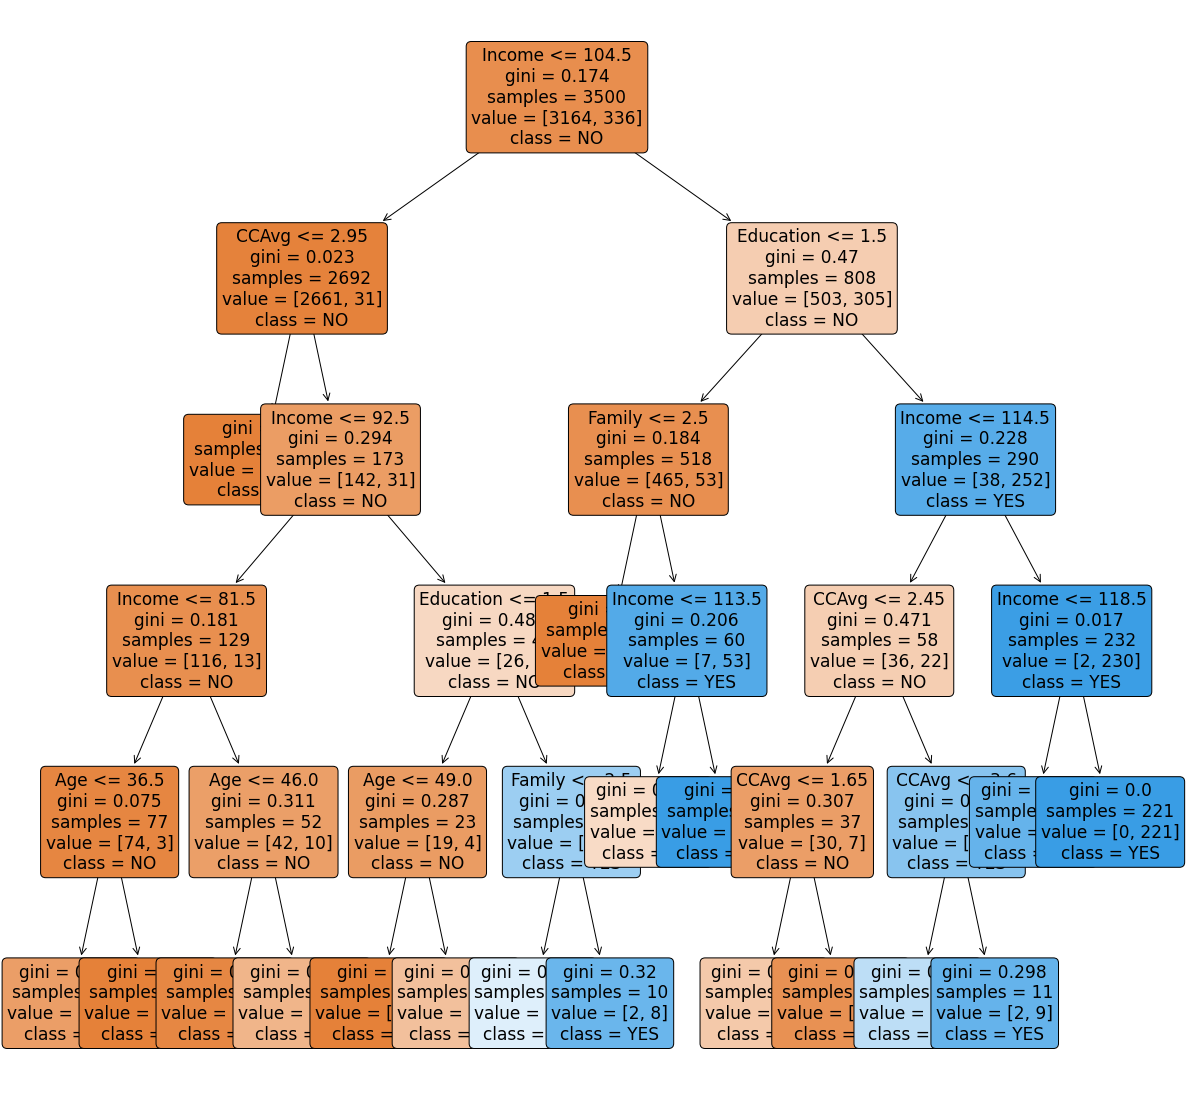

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
feature_name = x.columns.tolist()
target_name = np.array(['NO', 'YES'])
tree3 = plot_tree(tree_m_new7,
                 feature_names = feature_name,
                 class_names = target_name,
                 filled=True,
                 rounded=True,
                 fontsize=17)
